# Calculating Kendall's Tau for Various k

In [1]:
import csv

frb, telescope, snr, f_p, d_L, z = [], [], [], [], [], []

with open('frb.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            line_count += 1
            if float(row[2]) > 5:
                frb.append(row[0])
                telescope.append(row[1])
                snr.append(float(row[2]))
                f_p.append(float(row[3]))
                d_L.append(float(row[4]))
                z.append(float(row[5]))
    print(f'Processed {line_count} lines.')
    

'''
Note: Do not trust the Peak Flux, Peak Luminsotiy, and ESPECIALLY the Limiting Luminosity
THey may be wrong
'''

Column names are FRB, Telescope, S/N ratio, Peak Flux (Jy), Luminosity Distance (Gpc), Redshift (inferred), Peak Flux Limit (Jy), Peak Luminosity (W), Limiting Luminosity (W)
Processed 64 lines.


'\nNote: Do not trust the Peak Flux, Peak Luminsotiy, and ESPECIALLY the Limiting Luminosity\nTHey may be wrong\n'

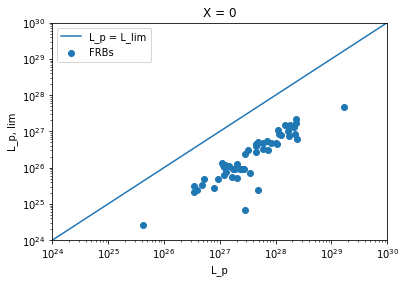

In [2]:
import math
import matplotlib.pyplot as plt

#Deriving New Parameters
f_lim = []
L_p = []
L_lim = []

X = 0

for i in range(len(f_p)):
    f_lim_i = f_p[i]/(snr[i])
    L_p_i = (f_p[i]*1e-26)*4*math.pi*(d_L[i]*3.08567758e25)**2
    L_lim_i = (f_lim_i*1e-26)*4*math.pi*(d_L[i]*3.08567758e25)**2
    f_lim.append(f_lim_i)
    L_p.append(L_p_i)
    L_lim.append(L_lim_i)
    
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(L_p, L_lim, label='FRBs')
ax.plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_lim')
ax.set_xlim([1e24, 1e30])
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('L_p')
ax.set_ylabel('L_p, lim')
ax.set_title('X = ' + str(0))
ax.legend()

plt.show()

In [3]:
from scipy import stats
#Find's Kendall's Tau for L_p, L_lim
tau, p_value = stats.kendalltau(L_p, L_lim)
print(tau)

0.7284166820346266


In [4]:
def kendall_tau(z, L):
    R = []
    E = []
    var = []

    for i in range(len(L)):
        L_i = L[i]
        z_i = z[i]
        higher_L = 0
        lower_L = 0
        higher_z = 0
        lower_z = 0

        for j in range(len(L)):
            if(j == i):
                continue
            L_j = L[j]
            z_j = z[j]
            if(L_j > L_lim(0.5, z_j) and z_j < z_i): #associated set requirements
                if(L_j < L_i):
                    lower_L += 1
                else:
                    higher_L += 1
            if(L_j > L_i and z_j < z_max(0.5, L_i)):
                if(z_j < z_i):
                    lower_z += 1
                else:
                    higher_z += 1

        N = higher_z + lower_z + 1
        E.append((lower_z+1)/N)

        N = higher_L + lower_L + 1    
        R.append((lower_L+1)/N)

        var.append(1/12 - 1/(12*N**2))
    
    tsum = sum(np.array(R)-np.array(E))
    bsum_sq = sum(var)
    return (tsum/(bsum_sq)**0.5)

In [5]:
#creating L' given original L, z, and k
#L' = L*g(z) = L*(1+z)^k
def new_L(L, z, k):
    L_new = []
    for i in range(len(L)):
        L_new_i = L[i]*((1+z[i])**k)
        L_new.append(L_new_i)
    return L_new

#finding tau given a value of k

def tau_k(L_p, L_lim, z, k):
    L_p_new = new_L(L_p, z, k)
    L_lim_new = new_L(L_lim, z, k)
    tau, p_value = stats.kendalltau(L_p_new, L_lim_new)
    return tau

In [6]:
#plot tau for multiple values of k
k_min = -25
k_max = 25
dk = 0.1

#the current k value
k = k_min

#list of k, tau
list_k = []
list_t = []

while(k <= k_max):
    list_k.append(k)
    list_t.append(tau_k(L_p, L_lim, z, k))
    k += dk

In [7]:
import matplotlib.pyplot as plt
import numpy as np

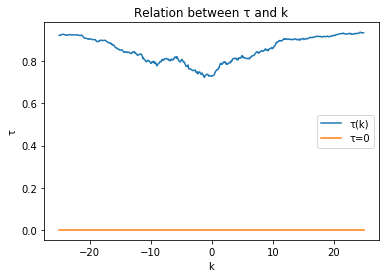

In [8]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(list_k, list_t, label='τ(k)')
ax.plot(list_k, [0 for i in range(len(list_k))], label='τ=0')
ax.set_xlabel('k')  # Add an x-label to the axes.
ax.set_ylabel('τ')  # Add a y-label to the axes.

ax.set_title("Relation between τ and k")  # Add a title to the axes.
ax.legend()  # Add a legend.

# Other related graphs

In [9]:
def save_my_ass(x):
    if x <= 1:
        return 1
    return x

0.15 147.5
0.0003940550522773168 132.5070154577884
0.0003998929049036474 212.01122473246144
0.00040088273882667625 251.9781801720236
0.0004018774850768665 352.769452240833
0.00040287718031337615 587.9490870680551
0.00040388186156104037 881.9236306020827


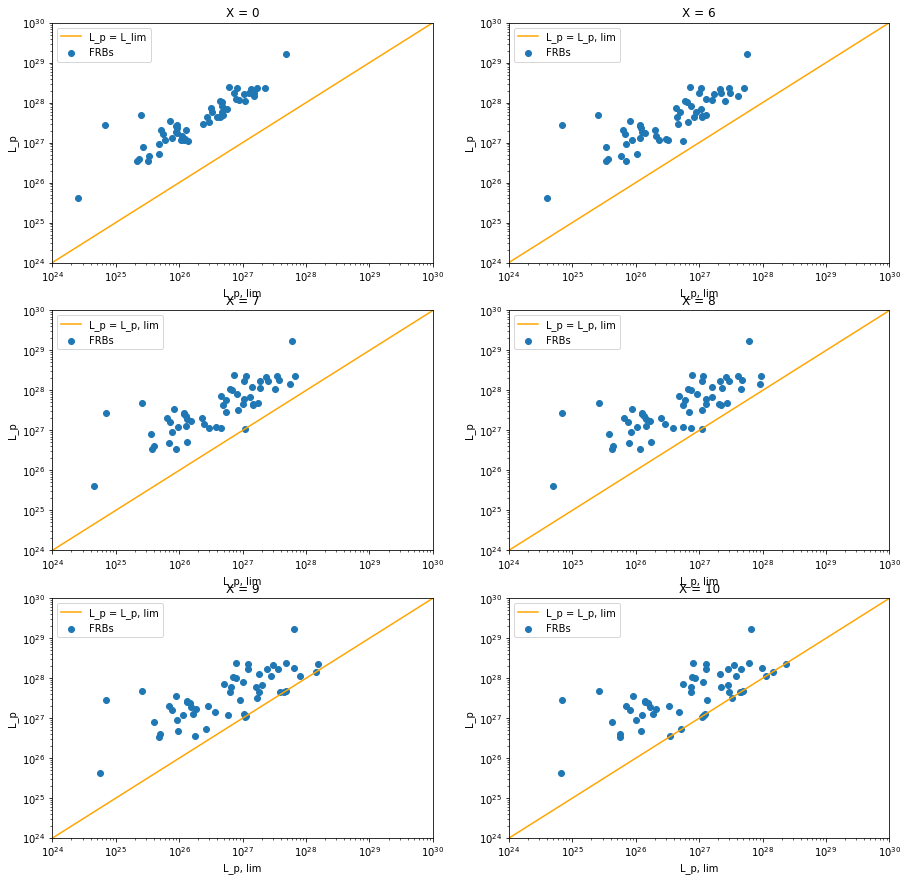

In [20]:
import math

X = [0, 6, 7, 8, 9, 10]

fig, ax = plt.subplots(3,2)
fig.set_figwidth(15)
fig.set_figheight(15)
print(min(f_p), max(f_p))

for i in range(1):
    L_lim_i = L_lim
    F_lim_i = [L_lim_i[j]/(4*math.pi*(sorted(d_L)[j]*3.08567758e25)**2)/1e-26 for j in range(len(L_lim))]
    print(min(F_lim_i), max(F_lim_i))
    ax[int(i/2)][i%2].set_yscale('log')
    ax[int(i/2)][i%2].set_xscale('log')
    ax[int(i/2)][i%2].scatter(L_lim_i, L_p, label='FRBs')
    ax[int(i/2)][i%2].plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_lim', color='orange')
    ax[int(i/2)][i%2].set_xlim([1e24, 1e30])
    ax[int(i/2)][i%2].set_ylim([1e24, 1e30])
    #ax[int(i/2)][i%2].set_xlim([1e24, 0.25e29])
    #ax[int(i/2)][i%2].set_ylim([1e24, 0.2e28])
    ax[int(i/2)][i%2].set_ylabel('L_p')
    ax[int(i/2)][i%2].set_xlabel('L_p, lim')
    ax[int(i/2)][i%2].set_title('X = 0')
    ax[int(i/2)][i%2].legend()

for i in range(1, len(X)):
    L_lim_i = [L_lim[j] * snr[j]/save_my_ass(snr[j]-X[i]) for j in range(len(L_lim))]
    F_lim_i = [L_lim_i[j]/(4*math.pi*(sorted(d_L)[j]*3.08567758e25)**2)/1e-26 for j in range(len(L_lim))]
    print(min(F_lim_i), max(F_lim_i))
    ax[int(i/2)][i%2].set_yscale('log')
    ax[int(i/2)][i%2].set_xscale('log')
    ax[int(i/2)][i%2].scatter(L_lim_i, L_p, label='FRBs')
    ax[int(i/2)][i%2].plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_p, lim', color='orange')
    ax[int(i/2)][i%2].set_xlim([1e24, 1e30])
    ax[int(i/2)][i%2].set_ylim([1e24, 1e30])
    #ax[int(i/2)][i%2].set_xlim([1e24, 0.25e29])
    #ax[int(i/2)][i%2].set_ylim([1e24, 0.2e28])
    ax[int(i/2)][i%2].set_ylabel('L_p')
    ax[int(i/2)][i%2].set_xlabel('L_p, lim')
    ax[int(i/2)][i%2].set_title('X = ' + str(X[i]))
    ax[int(i/2)][i%2].legend()


plt.show()

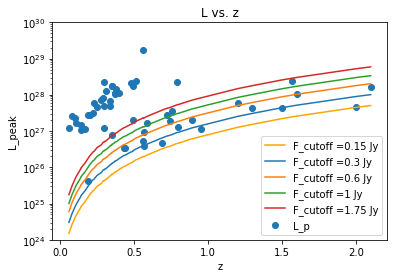

In [32]:
x=0
L_lim_i = [L_lim[j] for j in range(len(L_lim))]

F_cutoff = 0.15# in Jy
#x values are z
#y values are corresponding L's compared to F_lim
d_L_sorted = sorted(d_L)
L_cutoff =[(F_cutoff*1e-26)*4*math.pi*(d_L_sorted[i]*3.08567758e25)**2 for i in range(len(z))]
z_sorted = sorted(z)

fig, ax = plt.subplots()
plt.yscale('log')
#plt.xscale('log')
#ax.scatter(z, L_lim_i, label='L_{p,lim}')
ax.scatter(z, L_p, label='L_p')
ax.plot(z_sorted, L_cutoff, label='F_cutoff =' +str(F_cutoff)+ ' Jy', color='orange')

cuts = [0.3, 0.6, 1, 1.75]

for i in range(len(cuts)):
    ax.plot(z_sorted, np.array(L_cutoff)*cuts[i]/F_cutoff, label='F_cutoff =' +str(cuts[i])+ ' Jy')
#ax.plot(z_sorted, [(8e26/0.15)*F_cutoff*z_sorted[i]**2.4 for i in range(len(z_sorted))], label ='model', color = 'magenta')
#ax.set_xlim([1e24, 1e30])
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('z')
ax.set_ylabel('L_peak')
ax.set_title('L vs. z')
ax.legend()

In [ ]:
import csv

frb_all, telescope_all, snr_all= [], [], []

with open('frb_all.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            line_count += 1
            frb_all.append(row[0])
            telescope_all.append(row[1])
            snr_all.append(float(row[2]))
    print(f'Processed {line_count} lines.')

In [ ]:
LIM = 20
snr_all_n = []
for i in range(len(snr_all)):
    if snr_all[i] < LIM:
        snr_all_n.append(snr_all[i])

bin_width = 1
bins = int(max(snr_all_n)/bin_width) + 1
scalars = []
heights = [0 for x in range(bins)]
for i in range(bins):
    scalars.append(i*bin_width)
for b in snr_all_n:
    idx = int(b/bin_width)
    heights[idx] += 1
    
f1 = plt.figure()
plt.title("FRB to S/N relation")
plt.bar(scalars, heights, width=bin_width/1.5)
plt.ylabel("# of FRBs")
plt.xlabel("S/N ratio")

In [29]:
X = 0
(5 if X == 0 else X)

5